In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import clean_data
import helpers
import analysis
import figures


# Preamble

With the anticipation of Monster Hunter Rise, I wanted to take a look at the previous games in the Monster Hunter series. Monster Hunter is a series of video games made by Capcom that you play as a hunter that hunts various different and unique monsters. Large monsters act as "bosses" so the more monsters, the more potential playtime of the title. Each new installment brings new monsters, new ways to hunt the monsters and also brings older monsters from previous games. when a base version of a title is released, it followed by a sequel (known as a ultimate expansion of the base game). (with the exception of Portable 3rd). Ultimate expansions brings more monsters.




# Importing the Data

There are 3 csv files that I prepared that includes data such as monsters in each games, specific monster data, and title information. 

most of the data was collected refering to the website [MonsterHunter.Fandom](https://monsterhunter.fandom.com/wiki/Monster_Hunter_Wiki)

In [2]:
mh_data = clean_data.get_data()
mh_data

,Name,Type,Size,Title,Country Released,Date Released,Generation,Director,Console
0,Abyssal Lagiacrus,Leviathan,Large,Monster Hunter 3 Ultimate,JPN,2011-12-10,3,Kaname Fujioka,3DS
1,Abyssal Lagiacrus,Leviathan,Large,Monster Hunter 3 Ultimate,North America,2013-03-19,3,Kaname Fujioka,3DS
2,Agnaktor,Leviathan,Large,Monster Hunter 3 Ultimate,JPN,2011-12-10,3,Kaname Fujioka,3DS
3,Agnaktor,Leviathan,Large,Monster Hunter 3 Ultimate,North America,2013-03-19,3,Kaname Fujioka,3DS
4,Alatreon,Elder Dragon,Large,Monster Hunter 3 Ultimate,JPN,2011-12-10,3,Kaname Fujioka,3DS
...,...,...,...,...,...,...,...,...,...
2496,Vespoid,Neopteron,Small,Monster Hunter Freedom,North America,2006-05-23,1,Yasunori Ichinose,Playstation Portable
2497,White Monoblos,Flying Wyvern,Large,Monster Hunter Freedom,JPN,2005-12-01,1,Yasunori Ichinose,Playstation Portable
2498,White Monoblos,Flying Wyvern,Large,Monster Hunter Freedom,North America,2006-05-23,1,Yasunori Ichinose,Playstation Portable
2499,Yian Kut-Ku,Bird Wyvern,Large,Monster Hunter Freedom,JPN,2005-12-01,1,Yasunori Ichinose,Playstation Portable



## Amount of Monsters: Getting the Data

I wanted to see what how many monsters and what the proportion between new monsters to monster that were already introduced.

The analysis will be done on the following titles:
* Monster Hunter
* Monster Hunter Freedom 2
* Monster Hunter 3
* Monster Hunter Portable 3rd
* Monster Hunter 4
* Monster Hunter Generations
* Monster Hunter: World
* Monster Hunter Rise
* Monster Hunter Freedom
* Monster Hunter Freedom Unite
* Monster Hunter 3 Ultimate
* Monster Hunter 4 Ultimate
* Monster Hunter Generations Ultimate
* Monster Hunter World: Iceborne

We can filter the titles we want to analyze and for each title obtain:
* Amount of total monsters
* Amount of large monsters
* Amount of small monsters
* Amount of new monsters
* Amount of new large monsters
* Amount of new small monsters
* Amount of Variant/Subspecies/Deviants

in order to find the new monsters in the title, we need to get the list of monsters from the title and a list of monsters from all previous titles and take the difference of the previous monsters and the title monsters. 

The variants (which are generalization of subspecies/deviants/apex(Rise)) are retrieved by sorting a list of all the monsters names by string length and then iterating through the list from 1-n removing any that contains the shorter names which produces a list of non variant monsters. to get the variants we takes the difference of titles monsters and the non-variant title monsters.

see the [function](helpers.py) if interested





In [3]:
amt_analysis_titles = analysis.get_amt_titles_df()
amt_analysis_titles['Base'].append(amt_analysis_titles['Ultimate']).dropna()

0                         Monster Hunter
1               Monster Hunter Freedom 2
2                       Monster Hunter 3
3            Monster Hunter Portable 3rd
4                       Monster Hunter 4
5             Monster Hunter Generations
6                  Monster Hunter: World
7                    Monster Hunter Rise
0                 Monster Hunter Freedom
1           Monster Hunter Freedom Unite
2              Monster Hunter 3 Ultimate
4              Monster Hunter 4 Ultimate
5    Monster Hunter Generations Ultimate
6         Monster Hunter World: Iceborne
dtype: object

In [4]:
amt_analysis_titles_lst = amt_analysis_titles['Base'].append(amt_analysis_titles['Ultimate']).dropna()
titles_amt_data = mh_data[mh_data['Title'].isin(amt_analysis_titles_lst)==True]
amt_monsters_df = analysis.get_amt_table(amt_analysis_titles_lst,titles_amt_data)
amt_monsters_df[['Title','Total Monsters', 'Large Monsters','Small Monsters',
                      'New Monsters', 'New Large Monsters', 'New Small Monsters','Variant Monsters']]

,Title,Total Monsters,Large Monsters,Small Monsters,New Monsters,New Large Monsters,New Small Monsters,Variant Monsters
0,Monster Hunter,30,17,13,30,17,13,0
1,Monster Hunter Freedom,44,31,13,14,14,0,13
2,Monster Hunter Freedom 2,70,47,23,27,17,10,15
3,Monster Hunter Freedom Unite,81,58,23,11,11,0,20
4,Monster Hunter 3,35,19,16,26,16,10,0
5,Monster Hunter Portable 3rd,60,41,19,20,17,3,11
6,Monster Hunter 3 Ultimate,73,52,21,11,10,1,21
7,Monster Hunter 4,72,53,19,16,14,2,18
8,Monster Hunter 4 Ultimate,98,76,22,12,12,0,33
9,Monster Hunter Generations,105,72,33,22,19,3,16



# Amount of Monsters: Analysis


The trends in the ratio of new monsters to total seems consisent over the series with the exception of Monster Hunter, Monster Hunter 3, and Monster Hunter Generations Ultimate. Monster Hunter is the first game and Monster Hunter Generations Ultimate was a title that the wanted to bring back monsters from the previous games which explains the high to low ratios. Monster Hunter 3 has a low total monsters but a high ratio of new monsters. 


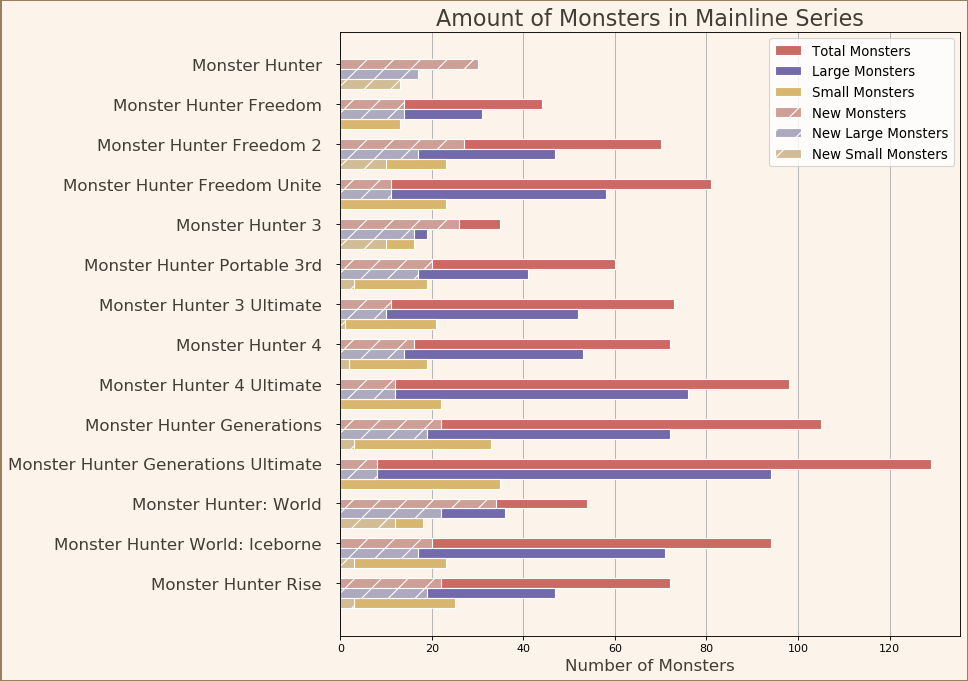

In [5]:
figures.make_amt_monsters(amt_monsters_df)

In [6]:
print("Mean of New Monster Ratio: ",amt_monsters_df['New Monster Ratio'].mean())
print("Median of New Monster Ratio: ",amt_monsters_df['New Monster Ratio'].median())
print("\nMean of Variant Monster Ratio: ",amt_monsters_df['Variant Monster Ratio'].mean())
print("Median of Variant Monster Ratio: ",amt_monsters_df['Variant Monster Ratio'].median())

Mean of New Monster Ratio:  0.391275807656466
Median of New Monster Ratio:  0.31292653552790045

Mean of Variant Monster Ratio:  0.2557283844476252
Median of Variant Monster Ratio:  0.29372080954852103



# Monsters Throughout the Series

We will be analyzing the same titles as the amount of monsters.

The monsters with the most occurances throughout the series is **Rathalos** and **Rathian** which have shown up in all analysis titles.

Rathalos  | Rathian
:-------------------------:|:----------------------:
![Rathalo](Resources/MHRise-Rathalos_Render_003.png) | ![Rathian](Resources/Rathian_Transparent01.png)

*Images from MonsterHunter.fandom*


In [7]:
monster_occurance_data = mh_data[mh_data['Title'].isin(amt_analysis_titles_lst) == True].sort_values(by=['Date Released']).drop_duplicates(subset=['Title','Name'],keep='first')
monster_occurance_data = monster_occurance_data[monster_occurance_data['Size'] == "Large"].groupby(['Name'])['Type'].count().sort_values(ascending=False)
monster_occurance_data.head(10)

Name
Rathalos           14
Rathian            14
Diablos            12
Silver Rathalos    10
Kirin              10
Gold Rathian       10
Deviljho            9
Teostra             9
Kushala Daora       9
Tigrex              9
Name: Type, dtype: int64


# Base Vs Ultimate?

Another question is how many months between a base game and the ultimate release. with the ultimate realease, it brings more monsters and more things to do!  

To find the amount of months between the version, I will use the japan release titles, the reason is titles were released in japan monsths before coming to the west.  

In [8]:
game_titles = analysis.get_base_ultimate_titles()
base_ultimate = analysis.get_base_ultimate_df(game_titles, mh_data)
print("Mean of time between games",base_ultimate['date_difference'].mean().days/30.5)
print("Median of time between games",base_ultimate['date_difference'].median().days/30.5)
base_ultimate

Mean of time between games 16.557377049180328
Median of time between games 14.327868852459016


,Title_base,Date Released_base,Large Monsters_base,Title_ultimate,Date Released_ultimate,Large Monsters_ultimate,date_difference,monster_difference
0,Monster Hunter,2004-03-11,17,Monster Hunter G,2005-01-20,28,315 days,11
1,Monster Hunter Freedom 2,2007-02-22,47,Monster Hunter Freedom Unite,2008-03-27,58,399 days,11
2,Monster Hunter 3,2009-08-01,19,Monster Hunter 3 Ultimate,2011-12-10,52,861 days,33
3,Monster Hunter 4,2013-09-14,53,Monster Hunter 4 G,2014-10-11,76,392 days,23
4,Monster Hunter X,2015-11-28,72,Monster Hunter XX,2017-03-18,94,476 days,22
5,Monster Hunter: World,2018-01-26,36,Monster Hunter World: Iceborne,2019-09-06,71,588 days,35



# When will Rise Ultimate Release?!?

we can hope that it will be released in 14-15 months on 

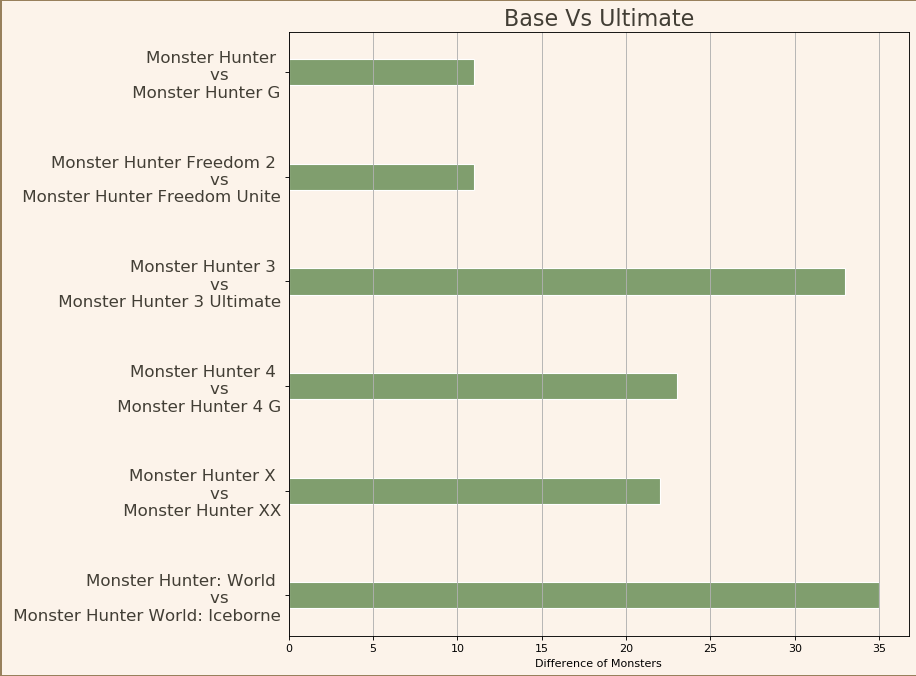

In [9]:
figures.make_base_ultimate(base_ultimate)

### Sorting monsters to Directors
I want to find if a director is more likely to use monsters that they have introduced
I want to get the data to have the relavant titles
total_new_monsters

In [10]:

director_data = mh_data.sort_values(by=['Date Released']).drop_duplicates(subset=['Name'],keep='first')

fujioka_titles = director_data[director_data['Director'] == 'Kaname Fujioka'][['Title','Date Released','Director']].sort_values(by='Date Released').drop_duplicates(subset=['Title'],keep='first')
ichinose_titles = director_data[director_data['Director'] == 'Yasunori Ichinose'][['Title','Date Released','Director']].sort_values(by='Date Released').drop_duplicates(subset=['Title'],keep='first')
tokuda_titles = director_data[director_data['Director'] == 'Yuya Tokuda'][['Title','Date Released','Director']].sort_values(by='Date Released').drop_duplicates(subset=['Title'],keep='first')

director_data['Director'].unique()

fujioka_monsters = director_data[director_data['Director'] == 'Kaname Fujioka'][['Name','Title']]
ichinose_monsters = director_data[director_data['Director'] == 'Yasunori Ichinose'][['Name','Title']]
tokuda_monsters = director_data[director_data['Director'] == 'Yuya Tokuda'][['Name','Title']]

# fujioka
fujioka_titles["Total Monsters"] = fujioka_titles['Title'].apply(lambda title:
                                                                 mh_data[mh_data['Title'] == title]['Name'].drop_duplicates().count()
                                                                )
fujioka_titles["Director Monsters"] = fujioka_titles['Title'].apply(lambda title:
                                                                 mh_data[ (mh_data['Title'] == title) & (mh_data['Name'].isin(fujioka_monsters['Name']) == True)]['Name'].drop_duplicates().count()
                                                                )
# ichinose
ichinose_titles["Total Monsters"] = ichinose_titles['Title'].apply(lambda title:
                                                                 mh_data[mh_data['Title'] == title]['Name'].drop_duplicates().count()
                                                                )
ichinose_titles["Director Monsters"] = ichinose_titles['Title'].apply(lambda title:
                                                                 mh_data[ (mh_data['Title'] == title) & (mh_data['Name'].isin(ichinose_monsters['Name']) == True)]['Name'].drop_duplicates().count()
                                                                )
# tokuda
tokuda_titles["Total Monsters"] = tokuda_titles['Title'].apply(lambda title:
                                                                 mh_data[mh_data['Title'] == title]['Name'].drop_duplicates().count()
                                                                )
tokuda_titles["Director Monsters"] = tokuda_titles['Title'].apply(lambda title:
                                                                 mh_data[ (mh_data['Title'] == title) & (mh_data['Name'].isin(tokuda_monsters['Name']) == True)]['Name'].drop_duplicates().count()
                                                                )
concat_director = pd.concat([fujioka_titles,ichinose_titles,tokuda_titles]).sort_values(by='Date Released')
concat_director['Director Monster Ratio'] = concat_director['Director Monsters'] / concat_director['Total Monsters']
concat_director

,Title,Date Released,Director,Total Monsters,Director Monsters,Director Monster Ratio
2327,Monster Hunter,2004-03-11,Kaname Fujioka,30,30,1.000000
2409,Monster Hunter G,2005-01-20,Kaname Fujioka,38,38,1.000000
2487,Monster Hunter Freedom,2005-12-01,Yasunori Ichinose,44,1,0.022727
2220,Monster Hunter 2,2006-02-16,Kaname Fujioka,68,68,1.000000
1303,Monster Hunter Freedom 2,2007-02-22,Yasunori Ichinose,70,3,0.042857
1437,Monster Hunter Freedom Unite,2008-03-27,Yasunori Ichinose,81,13,0.160494
562,Monster Hunter 3,2009-08-01,Kaname Fujioka,35,35,1.000000
624,Monster Hunter Portable 3rd,2010-12-01,Yasunori Ichinose,60,24,0.400000
42,Monster Hunter 3 Ultimate,2011-12-10,Kaname Fujioka,73,54,0.739726
1609,Monster Hunter 4,2013-09-14,Kaname Fujioka,72,63,0.875000


['Kaname Fujioka' 'Yasunori Ichinose' 'Yuya Tokuda']


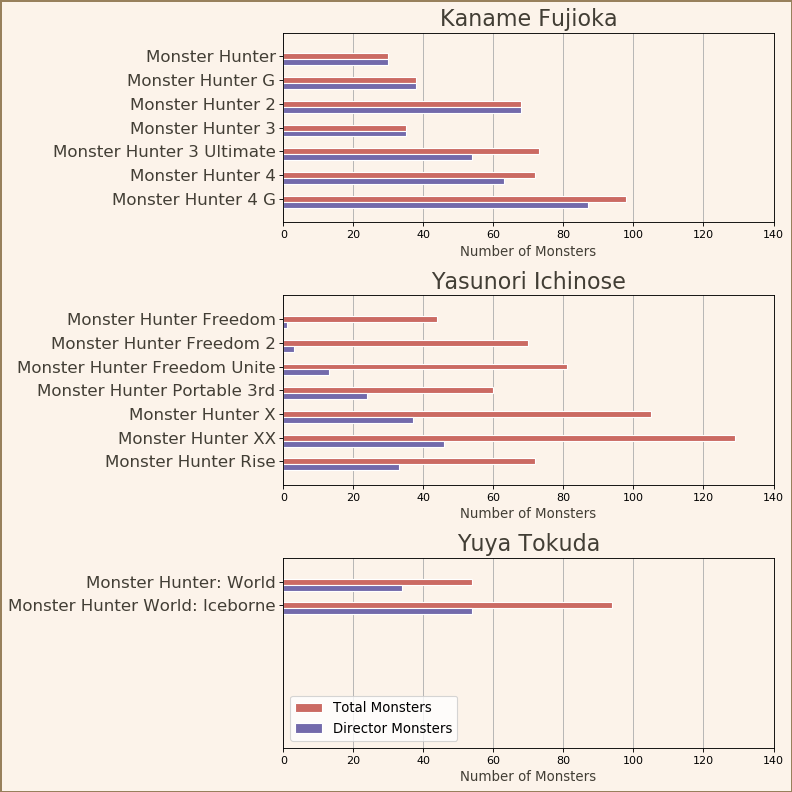

In [103]:

labels = concat_director['Director'].unique()
print(labels)
fujioka_data = concat_director[concat_director['Director'] == 'Kaname Fujioka']
ichinose_data = concat_director[concat_director['Director'] == 'Yasunori Ichinose']
tokuda_data = concat_director[concat_director['Director'] == 'Yuya Tokuda']

fujioka_titles = fujioka_data['Title'].to_list()
ichinose_titles = ichinose_data['Title'].to_list()
tokuda_titles = tokuda_data['Title'].to_list()

fujioka_tm = fujioka_data['Total Monsters'].to_list()
fujioka_dm = fujioka_data['Director Monsters'].to_list()

ichinose_tm = ichinose_data['Total Monsters'].to_list()
ichinose_dm = ichinose_data['Director Monsters'].to_list()

tokuda_tm = tokuda_data['Total Monsters'].to_list()
tokuda_dm = tokuda_data['Director Monsters'].to_list()

xlim = (0,140)
ylim = (-1,7)
fig, (ax0,ax1,ax2) = plt.subplots( 3, figsize=(10, 10), dpi=80)
plt.setp(ax0,xlim=xlim, ylim=ylim)
plt.setp(ax1,xlim=xlim, ylim=ylim)
plt.setp(ax2,xlim=xlim, ylim=ylim)
width = 0.25
rects1 = np.arange(len(fujioka_titles))
rects2 = [x + width for x in rects1]
ax0.barh(rects1, fujioka_tm, height=width, edgecolor='white', label='Total Monsters', color='#cb6a63', zorder=2)
ax0.barh(rects2, fujioka_dm, height=width, edgecolor='white', label='Director Monsters', color='#736aab', zorder=2)
ax0.set_xlabel("Number of Monsters", fontsize='12', color='#423e35')
ax0.set_yticks(rects1)
ax0.set_yticklabels(fujioka_titles, fontsize='15', color='#423e35')
# ax0.legend(fontsize='12')
ax0.invert_yaxis()
ax0.set_title('Kaname Fujioka', color='#423e35', fontsize='20')
ax0.set_facecolor('#fcf3ea')
ax0.grid(axis='x', zorder=0)

rects1 = np.arange(len(ichinose_titles))
rects2 = [x + width for x in rects1]
ax1.barh(rects1, ichinose_tm, height=width, edgecolor='white', label='Total Monsters', color='#cb6a63', zorder=2)
ax1.barh(rects2, ichinose_dm, height=width, edgecolor='white', label='Director Monsters', color='#736aab', zorder=2)
ax1.set_xlabel("Number of Monsters", fontsize='12', color='#423e35')
ax1.set_yticks(rects1)
ax1.set_yticklabels(ichinose_titles, fontsize='15', color='#423e35')
# ax1.legend(fontsize='12')
ax1.invert_yaxis()
ax1.set_title('Yasunori Ichinose', color='#423e35', fontsize='20')
ax1.set_facecolor('#fcf3ea')
ax1.grid(axis='x', zorder=0)

rects1 = np.arange(len(tokuda_titles))
rects2 = [x + width for x in rects1]
ax2.barh(rects1, tokuda_tm, height=width, edgecolor='white', label='Total Monsters', color='#cb6a63', zorder=2)
ax2.barh(rects2, tokuda_dm, height=width, edgecolor='white', label='Director Monsters', color='#736aab', zorder=2)
ax2.set_xlabel("Number of Monsters", fontsize='12', color='#423e35')
ax2.set_yticks(rects1)
ax2.set_yticklabels(tokuda_titles, fontsize='15', color='#423e35')
ax2.legend(fontsize='12',loc=3)
ax2.invert_yaxis()
ax2.set_title('Yuya Tokuda', color='#423e35', fontsize='20')
ax2.set_facecolor('#fcf3ea')
ax2.grid(axis='x', zorder=0)

fig.set_facecolor('#fcf3ea')
fig.set_edgecolor(color='#98805c')
fig.patch.set_linewidth('1')
fig.tight_layout()

fig.savefig('Figures/directors_monsters.png',
            facecolor=fig.get_facecolor(),
            edgecolor=fig.get_edgecolor(),
            bbox_inches="tight")